### Homework 1
### Name:Dev Panchal

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
df=pd.read_csv("airbnb_dallas.csv")
x=df.isna().sum()

In [3]:
x=pd.DataFrame(x)

In [4]:
y=x[x>1]
y

,0
Airbnb Host ID,NaN
Airbnb Property ID,NaN
City_x,NaN
superhost_period_all,NaN
scrapes_in_period,NaN
...,...
revenue_period_tract,NaN
tract_booking_share,NaN
tract_revenue_share,NaN
time_to_date_mean,16861.0


In [5]:
required_cols = ['booked_days','Superhost','numReviews_pastYear','numCancel_pastYear','superhost_change_lose_superhost','superhost_period_all','Nightly Rate','Listing Type','superhost_change_lose_superhost','revenue','prev_revenue','rating_ave_pastYear','numCancel_pastYear']

In [6]:
df.columns

Index(['Airbnb Host ID', 'Airbnb Property ID', 'City_x',
       'superhost_period_all', 'scrapes_in_period', 'Scraped Date',
       'superhost_observed_in_period', 'host_is_superhost_in_period',
       'superhost_ratio', 'prev_superhost_period_all',
       ...
       'prev_host_is_superhost2', 'prev_year_superhosts',
       'booked_days_period_city', 'revenue_period_city',
       'booked_days_period_tract', 'revenue_period_tract',
       'tract_booking_share', 'tract_revenue_share', 'time_to_date_mean',
       'prev_time_to_date_mean'],
      dtype='object', length=111)

In [7]:
#Removing the null values fromt the relevant columns
df_clean=df.dropna(subset=required_cols)

Q1.	What can you infer about booking patterns for Superhosts compared to non-Superhosts? Determine the best way to visualize the booked_days data and explain your findings.

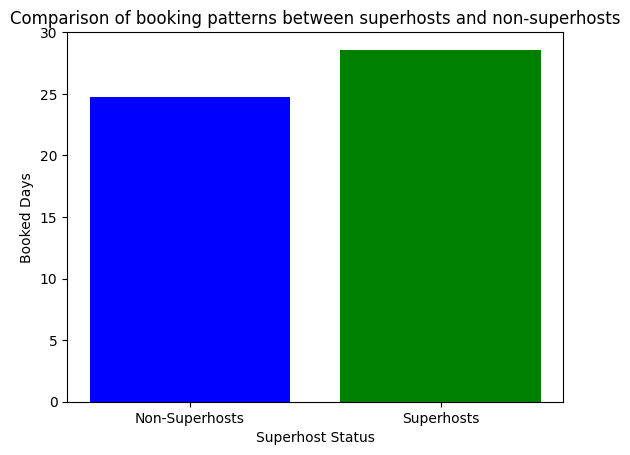

In [9]:
#Q1
group_names = ['Non-Superhosts', 'Superhosts']
group_averages = [df_clean['booked_days'].where(df['Superhost']==0).mean(), df_clean['booked_days'].where(df['Superhost']==1).mean()]  # Replace with your actual averages

# Create the bar plot
plt.bar(group_names, group_averages, color=['blue', 'green'])

# Add titles and labels
plt.title('Comparison of booking patterns between superhosts and non-superhosts')
plt.xlabel('Superhost Status')
plt.ylabel('Booked Days')

# Display the plot
plt.show()

Ans: Based on the bar graph comparing average booked days for superhosts and non-superhosts, we can infer that superhosts have more booked days on average than non-superhosts.

Q2.	How does Superhost status impact the number of reviews a property receives? Choose an appropriate method to compare the numReviews_pastYear for Superhosts and non-Superhosts.

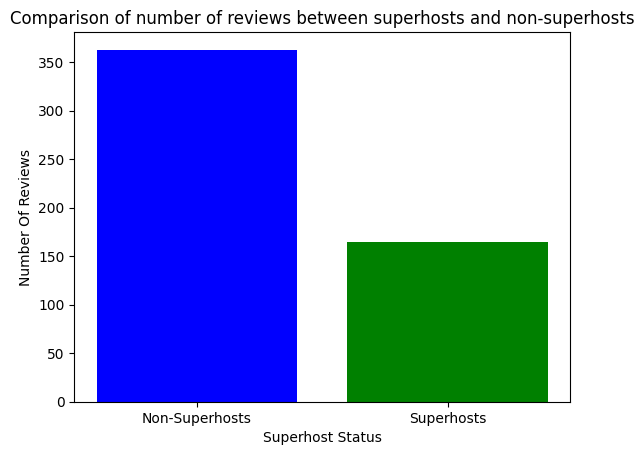

In [10]:
#Q2
group_names = ['Non-Superhosts', 'Superhosts']
group_averages = [df_clean['numReviews_pastYear'].where(df['Superhost']==0).mean(), df_clean['numReviews_pastYear'].where(df['Superhost']==1).mean()]  # Replace with your actual averages

# Create the bar plot
plt.bar(group_names, group_averages, color=['blue', 'green'])

# Add titles and labels
plt.title('Comparison of number of reviews between superhosts and non-superhosts')
plt.xlabel('Superhost Status')
plt.ylabel('Number Of Reviews')

# Display the plot
plt.show()

Ans: Based on the graph, we can see that non-superhosts get more reviews on average than superhost properties.

Q3.	What differences do you observe in cancellation behavior between Superhosts and non-Superhosts? Decide on a suitable way to analyze and present the numCancel_pastYear data

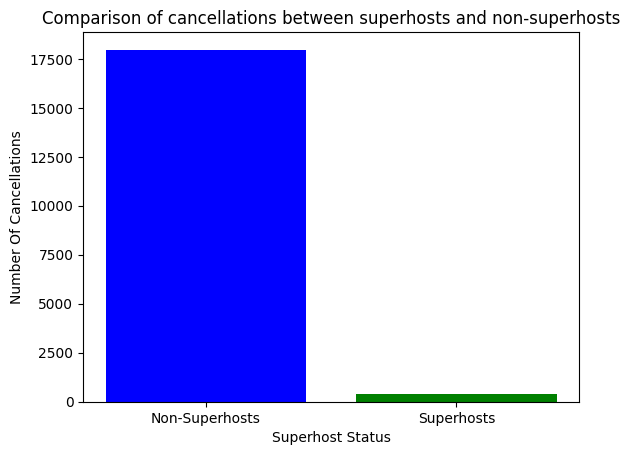

In [11]:
#Q3
group_names = ['Non-Superhosts', 'Superhosts']
group_averages = [df_clean['numCancel_pastYear'].where(df['Superhost']==0).sum(), df_clean['numCancel_pastYear'].where(df['Superhost']==1).sum()]  # Replace with your actual averages

# Create the bar plot
plt.bar(group_names, group_averages, color=['blue', 'green'])

# Add titles and labels
plt.title('Comparison of cancellations between superhosts and non-superhosts')
plt.xlabel('Superhost Status')
plt.ylabel('Number Of Cancellations')

# Display the plot
plt.show()

Ans: From the graph we can safely infer that the number of cancellations for non-superhosts are significantly higher that superhosts.

Q4.	Are there any seasonal patterns in the booking days for Superhosts? Select the best approach to visualize the trend in booked_days over different periods and discuss the patterns you identify.

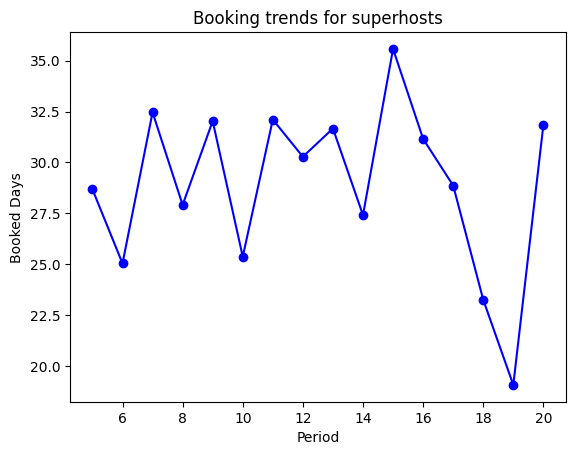

In [12]:
#Q4
data = df_clean['booked_days'].where(df_clean['Superhost']==1).groupby(df_clean['superhost_period_all']).mean()


# Plot the line graph
plt.plot(data, marker='o', linestyle='-', color='blue')

# Add titles and labels
plt.title('Booking trends for superhosts')
plt.xlabel('Period')
plt.ylabel('Booked Days')

# Display the plot
plt.show()

Ans: Based on the line graph, we can observe that the booked days see a downard seasonal trend each year around the evaluation period in the months of October to December. 

Q5.	How do reviews affect booking numbers? Determine the most effective way to visualize and analyze the relationship between numReviews_pastYear and booked_days.

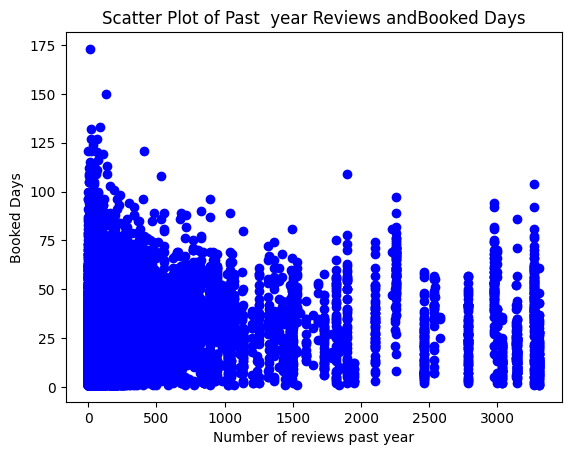

In [13]:
#Q5
plt.scatter(df_clean['numReviews_pastYear'],df_clean['booked_days'],color='blue', marker='o')

# Add titles and labels
plt.title('Scatter Plot of Past  year Reviews andBooked Days')
plt.xlabel('Number of reviews past year')
plt.ylabel('Booked Days')

# Display the plot
plt.show()

Ans:Overall, the trend suggests that properties with fewer reviews tend to have higher variability in bookings, whereas those with many reviews tend to have fewer but less inconsistent bookings, possibly due to factors like seasonality, availability, or changing popularity.

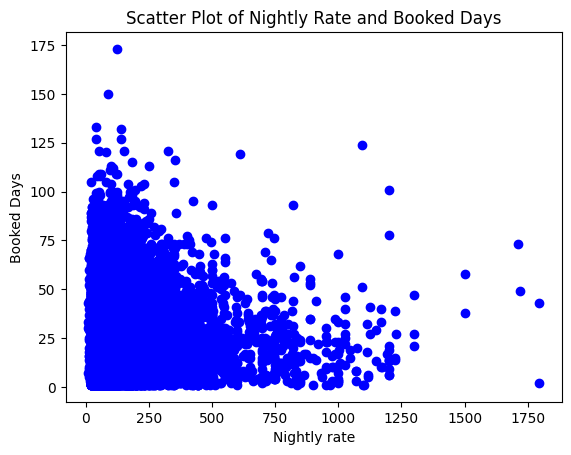

In [14]:
#Q6
plt.scatter(df_clean['Nightly Rate'],df_clean['booked_days'],color='blue', marker='o')

# Add titles and labels
plt.title('Scatter Plot of Nightly Rate and Booked Days')
plt.xlabel('Nightly rate')
plt.ylabel('Booked Days')

# Display the plot
plt.show()

Ans: The general trend shows that properties with more affordable nightly rates tend to have more bookings, while those with higher rates experience fewer bookings. This relationship could help in pricing strategies, showing that while premium properties might attract a smaller customer base, they may also be more profitable per booking.

Q7.	What listing type dominates bookings for Superhosts? Decide on the best way to visualize the composition of bookings by Listing Type and explain your conclusions.

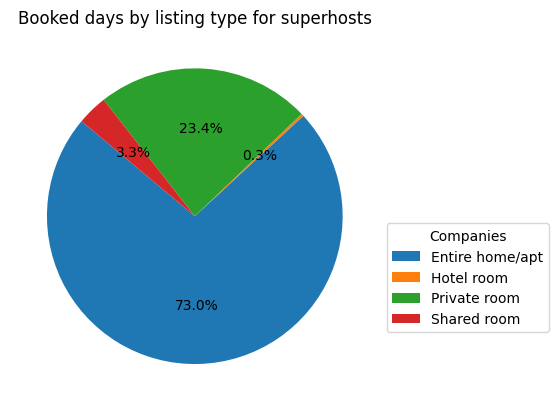

In [15]:
#Q7
data=df_clean['booked_days'].where(df['Superhost']==1).groupby(df['Listing Type']).sum()
plt.pie(data, autopct='%2.1f%%', startangle=140,)

# Add a title
plt.title('Booked days by listing type for superhosts')

plt.legend(data.index, title="Companies",bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()


Ans: It is clear from the pie chart that for superhosts, the most booked listing type is the entire home/apt. 

Q8.	How does losing Superhost status affect revenue? Determine the best way to compare revenue before and after losing Superhost status for properties that experienced superhost_change_lose_superhost.

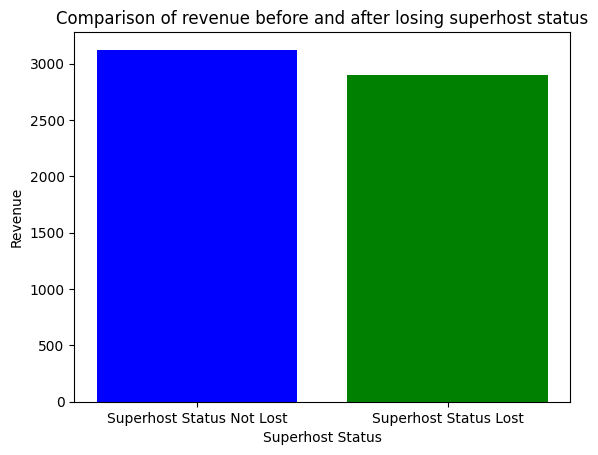

In [16]:
#Q8
group_names = ['Superhost Status Not Lost', 'Superhost Status Lost']
group_averages = [df_clean['revenue'].where(df['superhost_change_lose_superhost']==0).mean(), df_clean['revenue'].where(df['superhost_change_lose_superhost']==1).mean()]  # Replace with your actual averages

# Create the bar plot
plt.bar(group_names, group_averages, color=['blue', 'green'])

# Add titles and labels
plt.title('Comparison of revenue before and after losing superhost status')
plt.xlabel('Superhost Status')
plt.ylabel('Revenue')

# Display the plot
plt.show()

Ans:From the graph we can observe that after losing the superhost status, the average revenue is lower that that for proprties that have not lost the superhost status. From this, we can infer that on average, retaining the super host status is good for a host in terms of revenue.

Q9.	What insights can you gather about the distribution and consistency of ratings for Superhosts versus non-Superhosts? Choose an effective method to visualize and analyze the rating_ave_pastYear data.

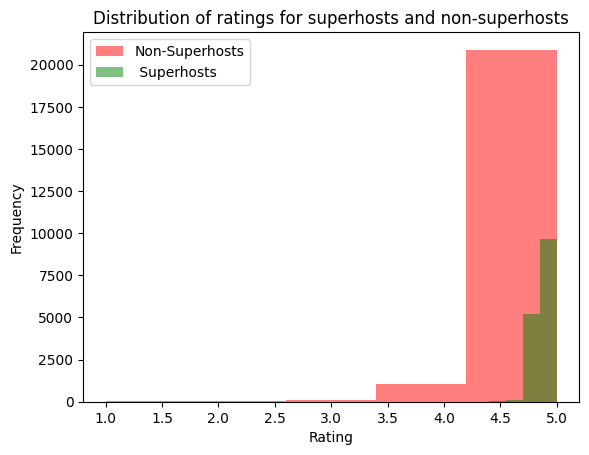

In [17]:
#Q9
df['rating_ave_pastYear'].where(df['Superhost']==0)

plt.hist(df['rating_ave_pastYear'].where(df['Superhost']==0), bins=5, alpha=0.5, label='Non-Superhosts', color='red')
plt.hist(df['rating_ave_pastYear'].where(df['Superhost']==1), bins=5, alpha=0.5, label=' Superhosts', color='green')

# Add titles and labels
plt.title('Distribution of ratings for superhosts and non-superhosts')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Add a legend
plt.legend(loc='upper left')

# Display the plot
plt.show()

Ans: For superhosts, majority of the ratings are distributed between 4.6 to 5 whereas for non-superhosts, most of the the ratings are distributed between 4.2 to 5 with a small chunk of them being below 4. From this, we can infer that superhosts generally get higher ratings than non-superhosts.In other words, we can say that the the probability of a superhost getting a rating below 4.6 is very low whereas for non-superhosts, there is a decent enough chance to get a rating below 4.6

Q10.What does the trend in cancellations over time reveal about Superhost properties? Select an appropriate way to visualize the trend in numCancel_pastYear for Superhosts across multiple periods and discuss your findings.

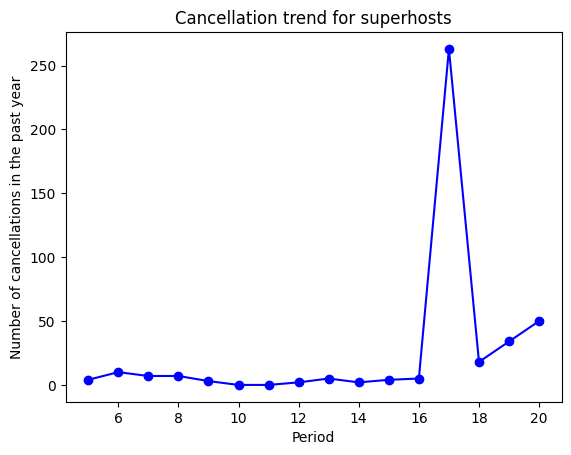

In [18]:
#Q10
data = df_clean['numCancel_pastYear'].where(df_clean['Superhost']==1).groupby(df_clean['superhost_period_all']).sum()


# Plot the line graph
plt.plot(data, marker='o', linestyle='-', color='blue')

# Add titles and labels
plt.title('Cancellation trend for superhosts')
plt.xlabel('Period')
plt.ylabel('Number of cancellations in the past year')

# Display the plot
plt.show()

Ans: From the line graph, we can observe that there is an extreme increase in the number of cancellations in period 17, which is Jul 2019 to Sept 2019 according to the given description. Also, after dropping down in period 18, there is still an upward trend in cancellations.This could be due to COVID.